In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

# a) y b)

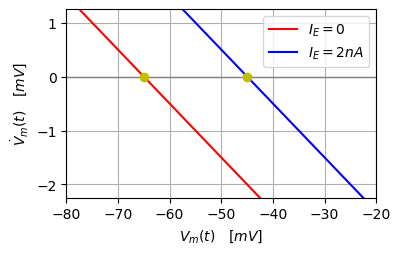

In [2]:
vm = np.linspace(-80, 10, 5000, endpoint=True)
vpunto1 = -vm/10 - (13/2)
vpunto2 = -vm/10 - (9/2)

plt.rcParams["figure.figsize"] = (4,2.5)
plt.rcParams['figure.dpi'] = 100

plt.plot(vm, vpunto1, 'r-', label=r'$I_E = 0$')
plt.plot(vm, vpunto2, 'b-', label=r'$I_E = 2nA$')
plt.axhline(y=0, color='grey', linewidth=1)
plt.axvline(x=0, color='grey', linewidth=1)
plt.plot(-65, 0, 'yo') 
plt.plot(-45, 0, 'yo') 

plt.xlabel(r'$V_m(t) \quad [mV]$')
plt.ylabel(r'$\dot{V}_m(t) \quad [mV]$')
plt.xlim(-80, -20)
plt.ylim(-2.25, 1.25)
plt.legend(loc='best')

plt.grid(True)
plt.show()

# d)

La solucion exacta esta dada por $$V(t) = Ce^{-\frac{t}{\tau_m}} + E_L + \frac{R_m}{\tau_m}e^{-\frac{R_m}{\tau_m}} \int I(t)e^{\frac{t}{\tau_m}} dt$$

Para $I(t) = 2$nA y $V(0) = -65$mV, se llega a $$V(t)= -20 e^{-\frac{t}{10}} - 45$$ para [t] = ms y [v] = mV

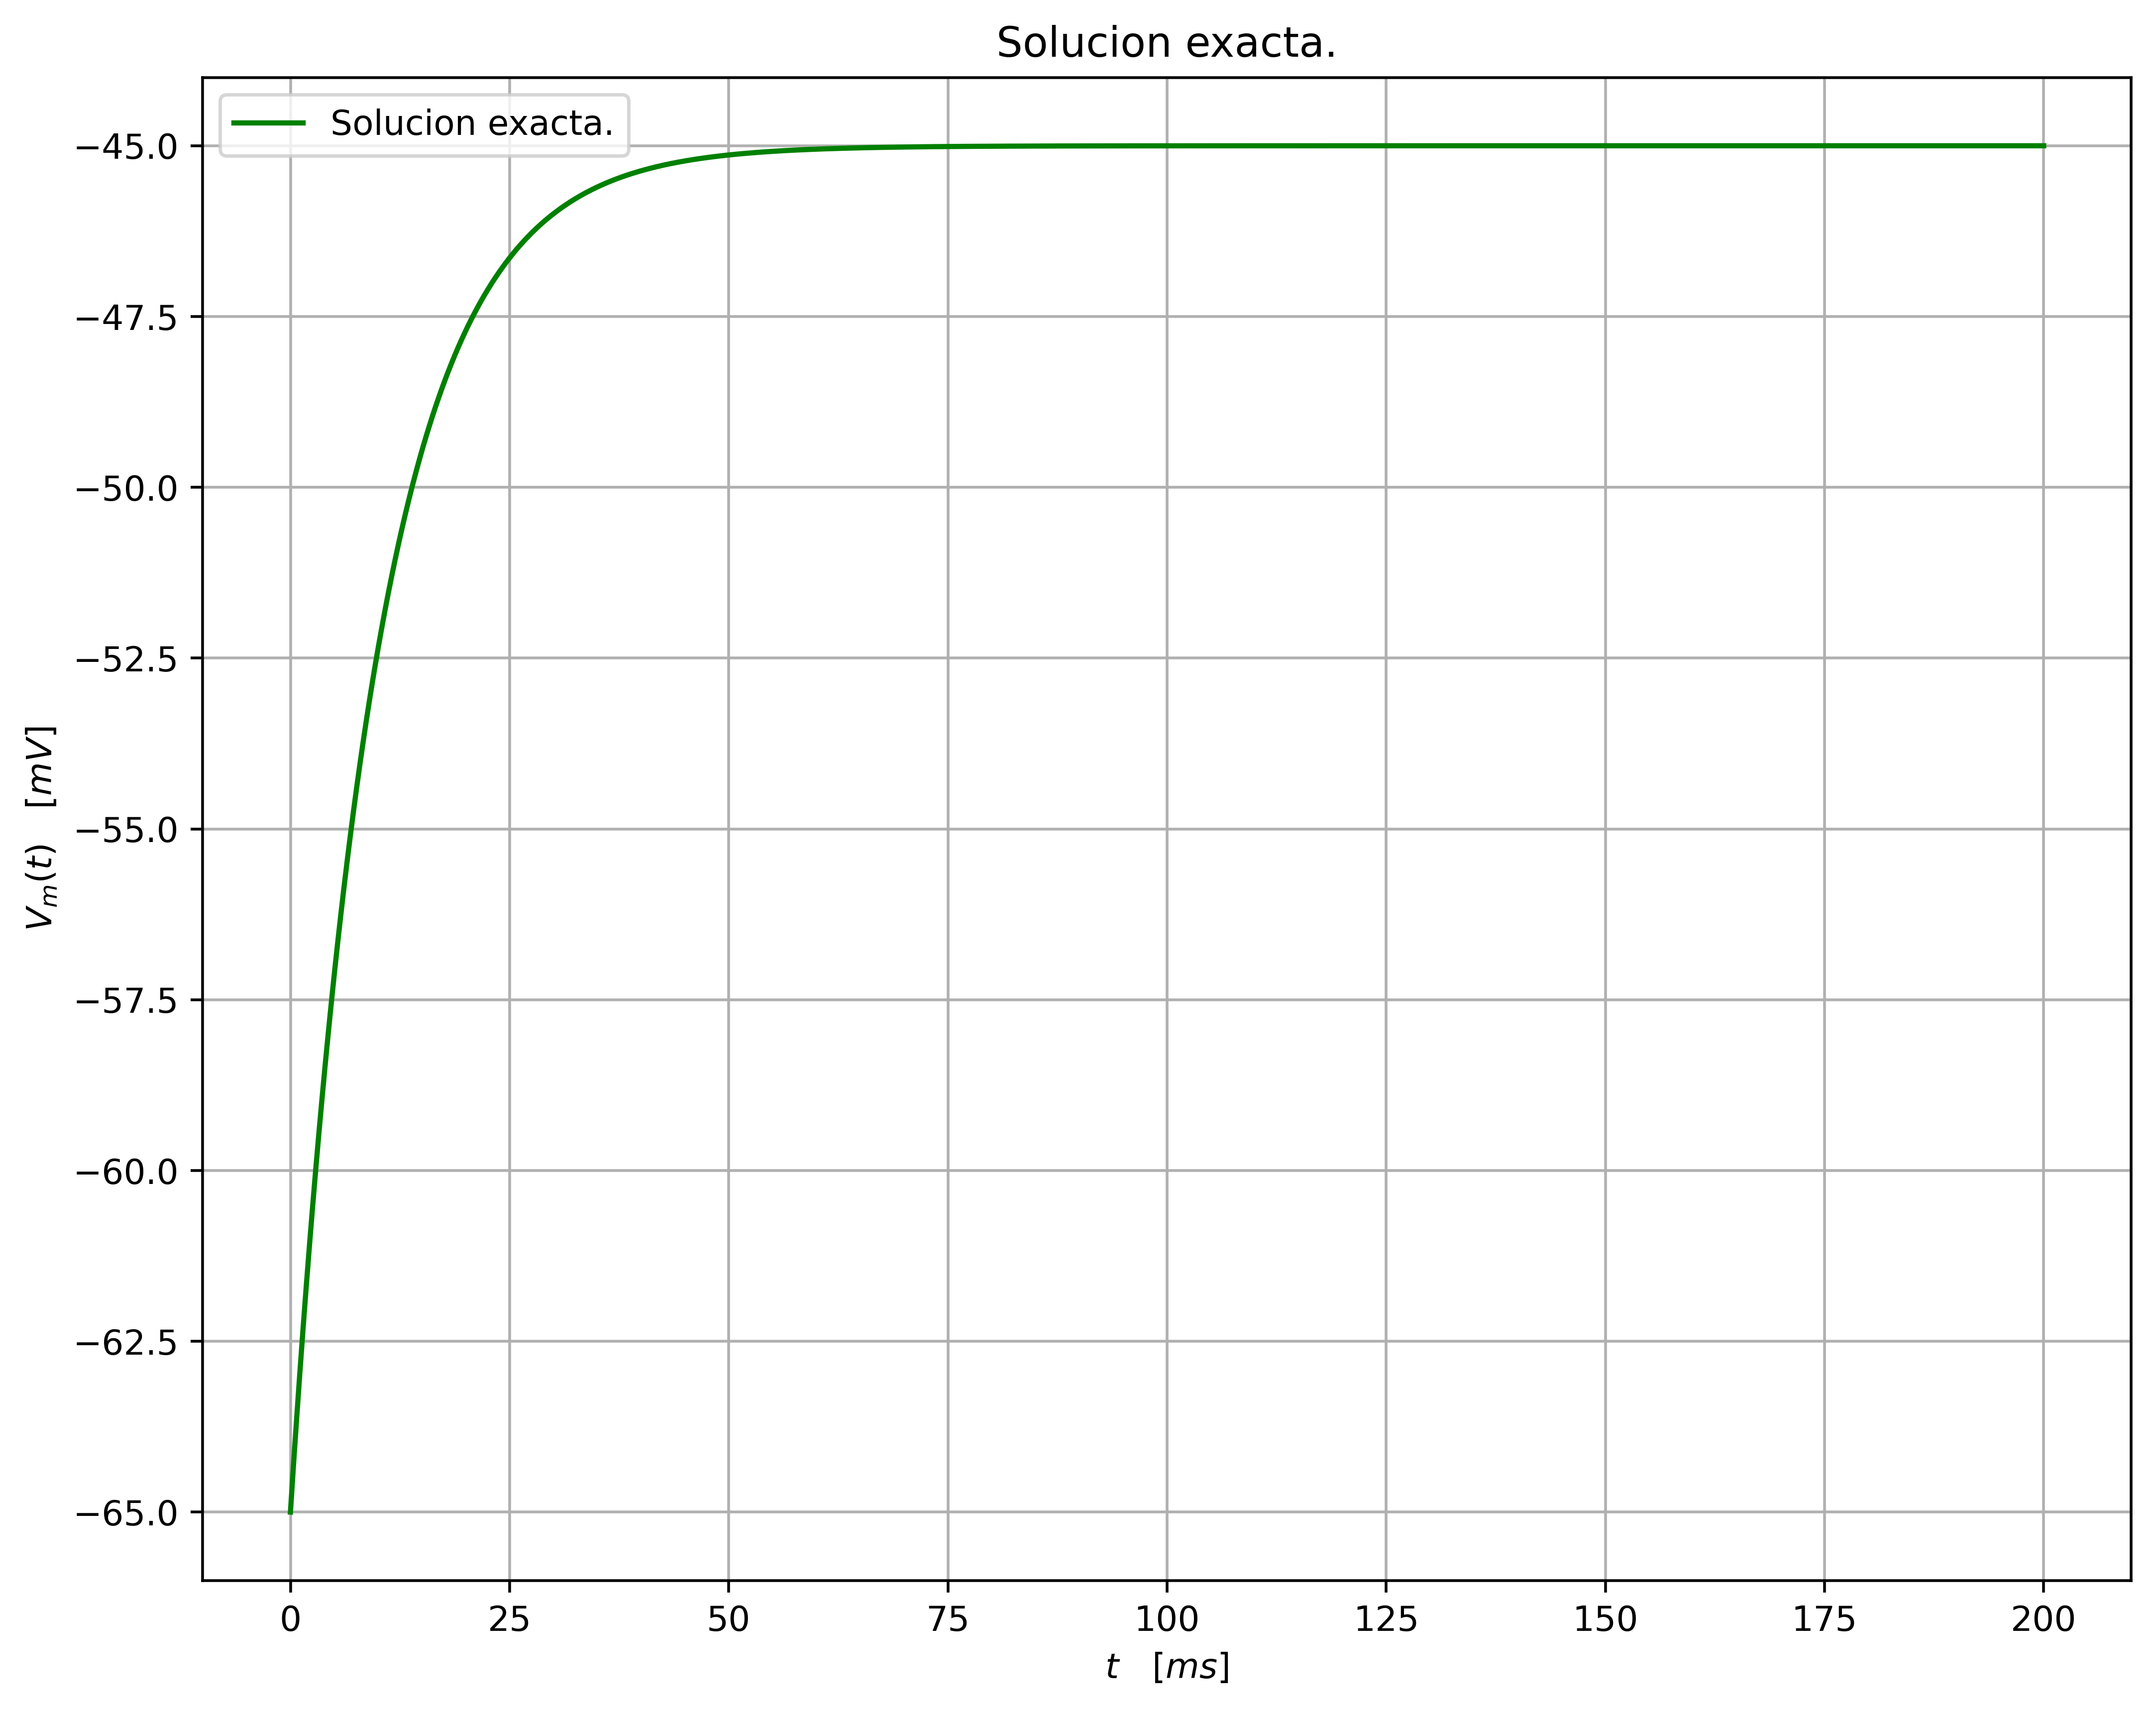

In [3]:
time = np.linspace(0, 200, 10000, endpoint=True)
exact = -20*np.exp(-time/10) -45

plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['figure.dpi'] = 500

plt.plot(time, exact, 'g-', label='Solucion exacta.')

plt.xlabel(r'$t \quad [ms]$')
plt.ylabel(r'$V_m(t) \quad [mV]$')
plt.title('Solucion exacta.')
plt.legend(loc='best')

plt.grid(True)
plt.show()

# e)

In [4]:
def function(x, t, parameters):
    # parameters[0] = tau, parameters[1] = E_L
    # parameters[2] = I(t)*R_m
    return (parameters[1] - x + parameters[2])/parameters[0]

In [5]:
def runge_kuta_4(function, parameters, x_0, t_0, t_f, steps):
    x = np.zeros(steps + 1)
    x[0] = x_0
    t = np.linspace(t_0, t_f, num=steps+1, endpoint=True)
    step = t[1] - t[0]
    
    for i in range(0, steps):
        k_1 = function(x[i], t[i], parameters)
        k_2 = function(x[i] + step*k_1/2, t[i] + step/2, parameters)
        k_3 = function(x[i] + step*k_2/2, t[i] + step/2, parameters)
        k_4 = function(x[i] + step*k_3, t[i] + step, parameters)
        
        x[i+1] = x[i] + step*(k_1 + 2*k_2 + 2*k_3 + k_4)/6
    
    return x, t

In [6]:
# 0.05 = 1/20
steps = 200*20
V, t = runge_kuta_4(function, np.array([10, -65, 20]), -65, 0, 200, steps)

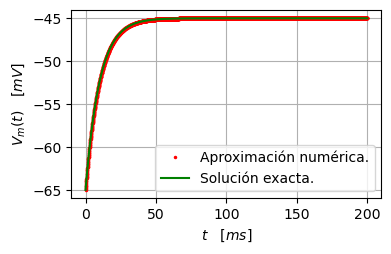

In [7]:
time = np.linspace(0, 200, 10000, endpoint=True)
exact = -20*np.exp(-time/10) -45

plt.rcParams["figure.figsize"] = (4,2.5)
plt.rcParams['figure.dpi'] = 100

plt.plot(t, V, 'ro', markersize=1.5, label='Aproximación numérica.')
plt.plot(time, exact, 'g-', label='Solución exacta.')

plt.xlabel(r'$t \quad [ms]$')
plt.ylabel(r'$V_m(t) \quad [mV]$')
plt.legend(loc='best')

plt.grid(True)
plt.show()

# f)

In [8]:
def corriente(t, i_parameter):
    # Corriente en nA.
    if i_parameter == 'f':
        return 2
    if i_parameter == 'g':
        return 2.5*np.cos(t/30) 
    if i_parameter == 'i':
        aux = np.cos(t/3) + np.sin(t/5) + np.cos(t/7) + np.sin(t/11) + np.cos(t/13)
        return 0.35*aux*aux
    else:
        return i_parameter
        

In [9]:
def function_m(x, t, parameters, corriente, i_parameter):
    # parameters[0] = tau, parameters[1] = E_L
    # parameters[2] = R_m en mOhm
    return (parameters[1] - x + corriente(t, i_parameter)*parameters[2])/parameters[0]

In [10]:
def runge_kuta_4_m(function_m, parameters, x_0, x_um, x_rest, t_0, t_f, corriente, i_parameter, steps):
    x = np.zeros(steps + 1)
    x[0] = x_0
    t = np.linspace(t_0, t_f, num=steps+1, endpoint=True)
    step = t[1] - t[0]
    
    for i in range(0, steps):
        k_1 = function_m(x[i], t[i], parameters, corriente, i_parameter)
        k_2 = function_m(x[i] + step*k_1/2, t[i] + step/2, parameters, corriente, i_parameter)
        k_3 = function_m(x[i] + step*k_2/2, t[i] + step/2, parameters, corriente, i_parameter)
        k_4 = function_m(x[i] + step*k_3, t[i] + step, parameters, corriente, i_parameter)
        
        x[i+1] = x[i] + step*(k_1 + 2*k_2 + 2*k_3 + k_4)/6
        
        if x[i+1] > x_um:
            x[i+1] = x_rest
    
    return x, t

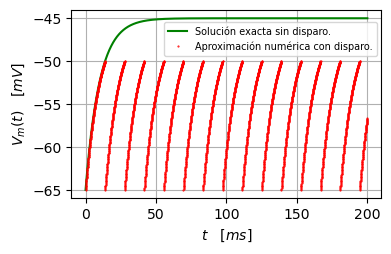

In [49]:
# 0.05 = 1/20
steps = 200*20
V, t = runge_kuta_4_m(function_m, np.array([10, -65, 10]), -65, -50, -65, 0, 200, corriente, 'f', steps)

plt.rcParams["figure.figsize"] = (4,2.5)
plt.rcParams['figure.dpi'] = 100

plt.plot(time, exact, 'g-', label='Solución exacta sin disparo.')
plt.plot(t, V, 'ro', markersize=0.5, label='Aproximación numérica con disparo.')

plt.xlabel(r'$t \quad [ms]$')
plt.ylabel(r'$V_m(t) \quad [mV]$')
plt.legend(bbox_to_anchor=[1, 0.96], loc='upper right', fontsize=7)

plt.grid(True)
plt.show()

# g)

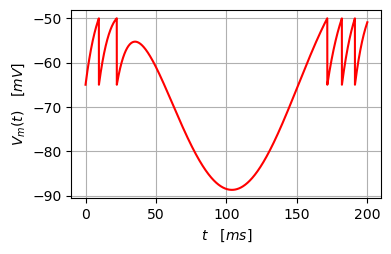

In [80]:
## 0.05 = 1/20
steps = 200*20
V, t = runge_kuta_4_m(function_m, np.array([10, -65, 10]), -65, -50, -65, 0, 200, corriente, 'g', steps)

plt.rcParams["figure.figsize"] = (4,2.5)
plt.rcParams['figure.dpi'] = 100

plt.plot(t, V, 'r-', markersize=2)

plt.xlabel(r'$t \quad [ms]$')
plt.ylabel(r'$V_m(t) \quad [mV]$')

plt.grid(True)
plt.show()

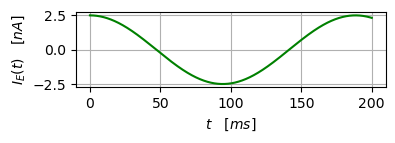

In [81]:
lacorriente = corriente(t, 'g')

plt.rcParams["figure.figsize"] = (4,1)
plt.rcParams['figure.dpi'] = 100

plt.plot(t, lacorriente, 'g-', markersize=2)

plt.xlabel(r'$t \quad [ms]$')
plt.ylabel(r'$I_E(t) \quad [nA]$')

plt.grid(True)
plt.show()

# h)

In [13]:
def runge_kuta_4_m_f(function_m, parameters, x_0, x_um, x_rest, t_0, t_f, corriente, i_parameter, steps):
    x = np.zeros(steps + 1)
    x[0] = x_0
    t = np.linspace(t_0, t_f, num=steps+1, endpoint=True)
    step = t[1] - t[0]
    
    for i in range(0, steps):
        k_1 = function_m(x[i], t[i], parameters, corriente, i_parameter)
        k_2 = function_m(x[i] + step*k_1/2, t[i] + step/2, parameters, corriente, i_parameter)
        k_3 = function_m(x[i] + step*k_2/2, t[i] + step/2, parameters, corriente, i_parameter)
        k_4 = function_m(x[i] + step*k_3, t[i] + step, parameters, corriente, i_parameter)
        
        x[i+1] = x[i] + step*(k_1 + 2*k_2 + 2*k_3 + k_4)/6
        
        if x[i+1] > x_um:
            t_disp = t[i+1]
            return t_disp
    return 0

In [58]:
coshiente = np.linspace(0, 2.5, 26, endpoint=True)
freq = np.zeros(26)

for it in range(0, 26):
    steps = 200*20
    t_disp = runge_kuta_4_m_f(function_m, np.array([10, -65, 10]), -65, -50, -65, 0, 200, corriente, coshiente[it], steps)
    if t_disp == 0:
        freq[it] = 0
    else:
        freq[it] = 1/t_disp

coshiente2 = np.linspace(0, 2.5, 5000, endpoint=True)
freq2 = np.zeros(5000)

for it in range(3001, 5000):
    try:
        sarabonga = np.log(1 - (15/ (10*coshiente2[it])) )
        freq2[it] = -1 / (10*sarabonga)
    except ZeroDivisionError:
        pass

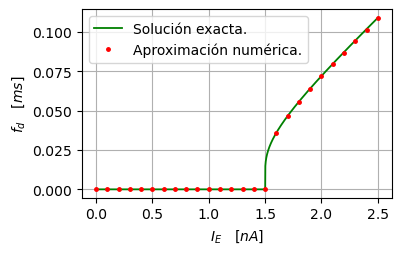

In [65]:
plt.rcParams["figure.figsize"] = (4,2.5)
plt.rcParams['figure.dpi'] = 100

plt.plot(coshiente2, freq2, 'g-', linewidth=1.3, label='Solución exacta.')
plt.plot(coshiente, freq, 'ro', markersize=2.5, label='Aproximación numérica.')

plt.xlabel(r'$I_E \quad [nA]$')
plt.ylabel(r'$f_d \quad [ms]$')
plt.legend(loc='best')

plt.grid(True)
plt.show()

# i)

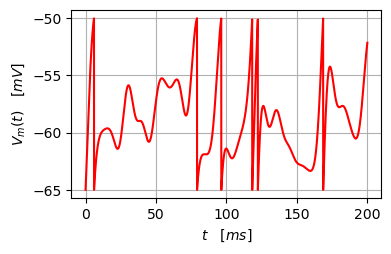

In [84]:
# 0.05 = 1/20
steps = 200*20
V, t = runge_kuta_4_m(function_m, np.array([10, -65, 10]), -65, -50, -65, 0, 200, corriente, 'i', steps)

plt.rcParams["figure.figsize"] = (4,2.5)
plt.rcParams['figure.dpi'] = 100

plt.plot(t, V, 'r-', markersize=2)

plt.xlabel(r'$t \quad [ms]$')
plt.ylabel(r'$V_m(t) \quad [mV]$')

plt.grid(True)
plt.show()

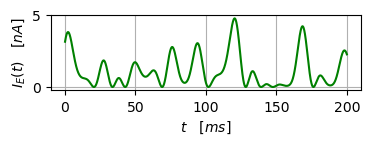

In [85]:
lacorriente = corriente(t, 'i')

plt.rcParams["figure.figsize"] = (4,1)
plt.rcParams['figure.dpi'] = 100

plt.plot(t, lacorriente, 'g-', markersize=2)

plt.xlabel(r'$t \quad [ms]$')
plt.ylabel(r'$I_E(t) \quad [nA]$')

plt.grid(True)
plt.show()